#### Loading and Merging NYC Taxi Trip and Fare Datasets

In [1]:
# Importing libraries 
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

In [2]:
# Load in the data 
trip = pd.read_csv("/Users/christian.woodruff/Documents/Data_Science/DS420/Datasets/NYC_Taxi_2013_One_Percent_Trip.csv")
fare = pd.read_csv("/Users/christian.woodruff/Documents/Data_Science/DS420/Datasets/NYC_Taxi_2013_One_Percent_Fare.csv")

In [3]:
df = pd.merge(fare, trip, on=['medallion', 'hack_license', 'vendor_id', 'pickup_datetime'])
df.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,...,rate_code,store_and_fwd_flag,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/8/2013 9:55:27 PM,CSH,10.5,0.5,0.5,0.0,11.5,...,1,N,3/8/2013 10:05:59 PM,2,631,2.5,-73.959610,40.715942,-73.963417,40.692169
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 6:51:52 PM,CRD,9.5,0.0,0.5,0.0,12.0,...,1,N,3/9/2013 7:02:59 PM,2,666,1.8,-73.973373,40.763958,-73.977303,40.782139
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 7:04:35 PM,CSH,18.0,0.0,0.5,0.0,18.5,...,1,N,3/9/2013 7:27:57 PM,2,1401,4.4,-73.977837,40.782818,-74.000893,40.737076
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 8:33:06 PM,CSH,11.5,0.5,0.5,0.0,12.5,...,1,N,3/9/2013 8:45:38 PM,1,751,2.8,-73.980331,40.784382,-73.984291,40.748688
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 11:10:38 PM,CRD,6.0,0.5,0.5,0.0,8.4,...,1,N,3/9/2013 11:14:59 PM,1,261,1.5,-73.986687,40.749474,-73.990677,40.762524


#### Cleaning the Data 

#### Dividing Data into Zones

In [4]:
nyc_lat_min = 40.49
nyc_lat_max = 41.11

nyc_long_min = -74.26
nyc_long_max = -71.87

long_checker = (df.pickup_longitude < nyc_long_min) | (df.pickup_longitude > nyc_long_max)
lat_checker = (df.pickup_latitude < nyc_lat_min) | (df.pickup_latitude > nyc_lat_max)
taxi = df.drop(df[long_checker | lat_checker].index)
taxi.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,...,rate_code,store_and_fwd_flag,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/8/2013 9:55:27 PM,CSH,10.5,0.5,0.5,0.0,11.5,...,1,N,3/8/2013 10:05:59 PM,2,631,2.5,-73.959610,40.715942,-73.963417,40.692169
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 6:51:52 PM,CRD,9.5,0.0,0.5,0.0,12.0,...,1,N,3/9/2013 7:02:59 PM,2,666,1.8,-73.973373,40.763958,-73.977303,40.782139
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 7:04:35 PM,CSH,18.0,0.0,0.5,0.0,18.5,...,1,N,3/9/2013 7:27:57 PM,2,1401,4.4,-73.977837,40.782818,-74.000893,40.737076
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 8:33:06 PM,CSH,11.5,0.5,0.5,0.0,12.5,...,1,N,3/9/2013 8:45:38 PM,1,751,2.8,-73.980331,40.784382,-73.984291,40.748688
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 11:10:38 PM,CRD,6.0,0.5,0.5,0.0,8.4,...,1,N,3/9/2013 11:14:59 PM,1,261,1.5,-73.986687,40.749474,-73.990677,40.762524


In [5]:
# Converting pickup latitude and pickup longitude into numerical values
taxi["pickup_latitude"] = taxi["pickup_latitude"].apply(pd.to_numeric)
taxi["pickup_longitude"] = taxi["pickup_longitude"].apply(pd.to_numeric)

In [6]:
# Breaking the pickup latitude into zones
i = taxi["pickup_latitude"].min()
stepSize = 0.05
zoneCnt = 1
while i < taxi["pickup_latitude"].max():
    taxi.loc[(taxi["pickup_latitude"] >= i) & (taxi["pickup_latitude"] < i+stepSize), "pickup_lat_zone"] = zoneCnt
    i = i + stepSize 
    zoneCnt = zoneCnt + 1
    
taxi.pickup_lat_zone.max()

12.0

In [7]:
# Breaking the pickup longitude into zones
i = taxi["pickup_longitude"].min()
stepSize = 0.2
zoneCnt = 1
while i < taxi["pickup_longitude"].max():
    taxi.loc[(taxi["pickup_longitude"] >= i) & (taxi["pickup_longitude"] < i+stepSize), "pickup_lon_zone"] = zoneCnt
    i = i + stepSize 
    zoneCnt = zoneCnt + 1
        
taxi.pickup_lon_zone.max()

12.0

In [8]:
taxi.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,...,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_lat_zone,pickup_lon_zone
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/8/2013 9:55:27 PM,CSH,10.5,0.5,0.5,0.0,11.5,...,3/8/2013 10:05:59 PM,2,631,2.5,-73.959610,40.715942,-73.963417,40.692169,4.0,2.0
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 6:51:52 PM,CRD,9.5,0.0,0.5,0.0,12.0,...,3/9/2013 7:02:59 PM,2,666,1.8,-73.973373,40.763958,-73.977303,40.782139,5.0,2.0
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 7:04:35 PM,CSH,18.0,0.0,0.5,0.0,18.5,...,3/9/2013 7:27:57 PM,2,1401,4.4,-73.977837,40.782818,-74.000893,40.737076,6.0,2.0
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 8:33:06 PM,CSH,11.5,0.5,0.5,0.0,12.5,...,3/9/2013 8:45:38 PM,1,751,2.8,-73.980331,40.784382,-73.984291,40.748688,6.0,2.0
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 11:10:38 PM,CRD,6.0,0.5,0.5,0.0,8.4,...,3/9/2013 11:14:59 PM,1,261,1.5,-73.986687,40.749474,-73.990677,40.762524,5.0,2.0


In [9]:
# Determining the regions based on latitude and longitude zones
i = 1
j = 1
regionCnt = 1 

while i <= taxi.pickup_lat_zone.max():
    while j <= taxi.pickup_lon_zone.max(): 
        taxi.loc[(taxi["pickup_lat_zone"] == i) & (taxi["pickup_lon_zone"] == j), "pickup_region"] = regionCnt 
        j = j + 1 
        regionCnt = regionCnt + 1
    j = 1  
    i = i + 1
    regionCnt = regionCnt + 1

#### Grouping Data by Time (at the granularity of an hour)

In [10]:
# Parsing Pickup Datetime 
def convertTime(timeStr):
    date = datetime.datetime.strptime(timeStr, "%m/%d/%Y %I:%M:%S %p")
    return str(date.year) + " " + str(date.month) + " " + str(date.day) + " " + str(date.hour)

taxi["pickup_datetime_parsed"] = taxi["pickup_datetime"].apply(convertTime)
taxi.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,...,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_lat_zone,pickup_lon_zone,pickup_region,pickup_datetime_parsed
0,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/8/2013 9:55:27 PM,CSH,10.5,0.5,0.5,0.0,11.5,...,631,2.5,-73.959610,40.715942,-73.963417,40.692169,4.0,2.0,41.0,2013 3 8 21
1,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 6:51:52 PM,CRD,9.5,0.0,0.5,0.0,12.0,...,666,1.8,-73.973373,40.763958,-73.977303,40.782139,5.0,2.0,54.0,2013 3 9 18
2,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 7:04:35 PM,CSH,18.0,0.0,0.5,0.0,18.5,...,1401,4.4,-73.977837,40.782818,-74.000893,40.737076,6.0,2.0,67.0,2013 3 9 19
3,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 8:33:06 PM,CSH,11.5,0.5,0.5,0.0,12.5,...,751,2.8,-73.980331,40.784382,-73.984291,40.748688,6.0,2.0,67.0,2013 3 9 20
4,00005007A9F30E289E760362F69E4EAD,A9AE329EA1138052DAC8FDFD8BA86603,CMT,3/9/2013 11:10:38 PM,CRD,6.0,0.5,0.5,0.0,8.4,...,261,1.5,-73.986687,40.749474,-73.990677,40.762524,5.0,2.0,54.0,2013 3 9 23


In [11]:
# Parsing Pickup Datetime 
def convertTime(timeStr):
    date = datetime.datetime.strptime(timeStr, "%m/%d/%Y %I:%M:%S %p")
    return str(date.year) + " " + str(date.month) + " " + str(date.day) + " " + str(date.hour)

taxi["pickup_datetime_parsed"] = taxi["pickup_datetime"].apply(convertTime)

# Grouping the data by time (at the granularity of an hour) and region
aggregated = taxi.groupby(["pickup_region", "pickup_datetime_parsed"])["pickup_datetime_parsed"].count().reset_index(name="count")
aggregated.head()

,pickup_region,pickup_datetime_parsed,count
0,1.0,2013 1 4 2,1
1,1.0,2013 9 27 0,1
2,1.0,2013 9 27 1,1
3,2.0,2013 6 9 8,1
4,2.0,2013 7 25 13,1


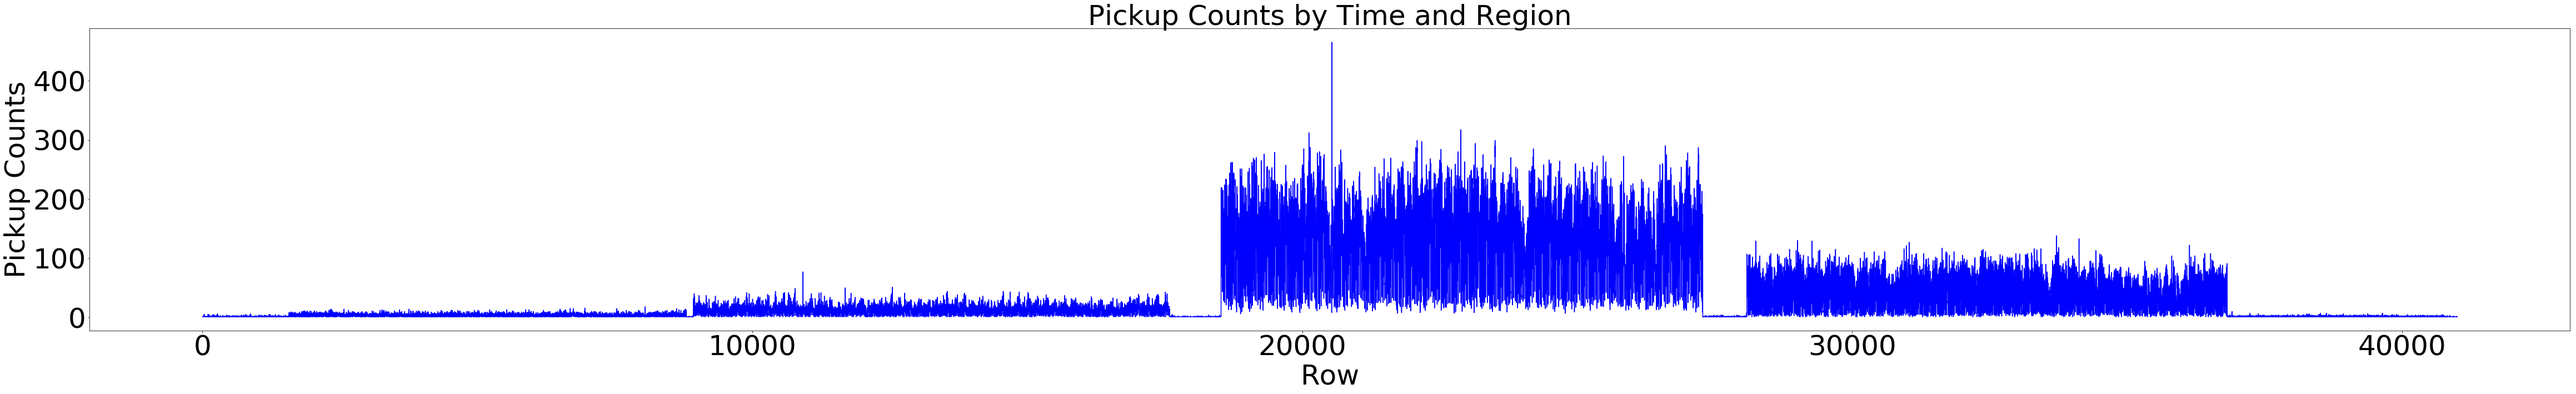

In [12]:
cnt = aggregated['count']
plt.figure(figsize=(80,10))
plt.plot(cnt,'b')
plt.xlabel('Row', size = 50)
plt.ylabel('Pickup Counts', size = 50)
plt.title('Pickup Counts by Time and Region', size = 50)
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()

In [13]:
aggregated = aggregated[aggregated["count"] < 300]

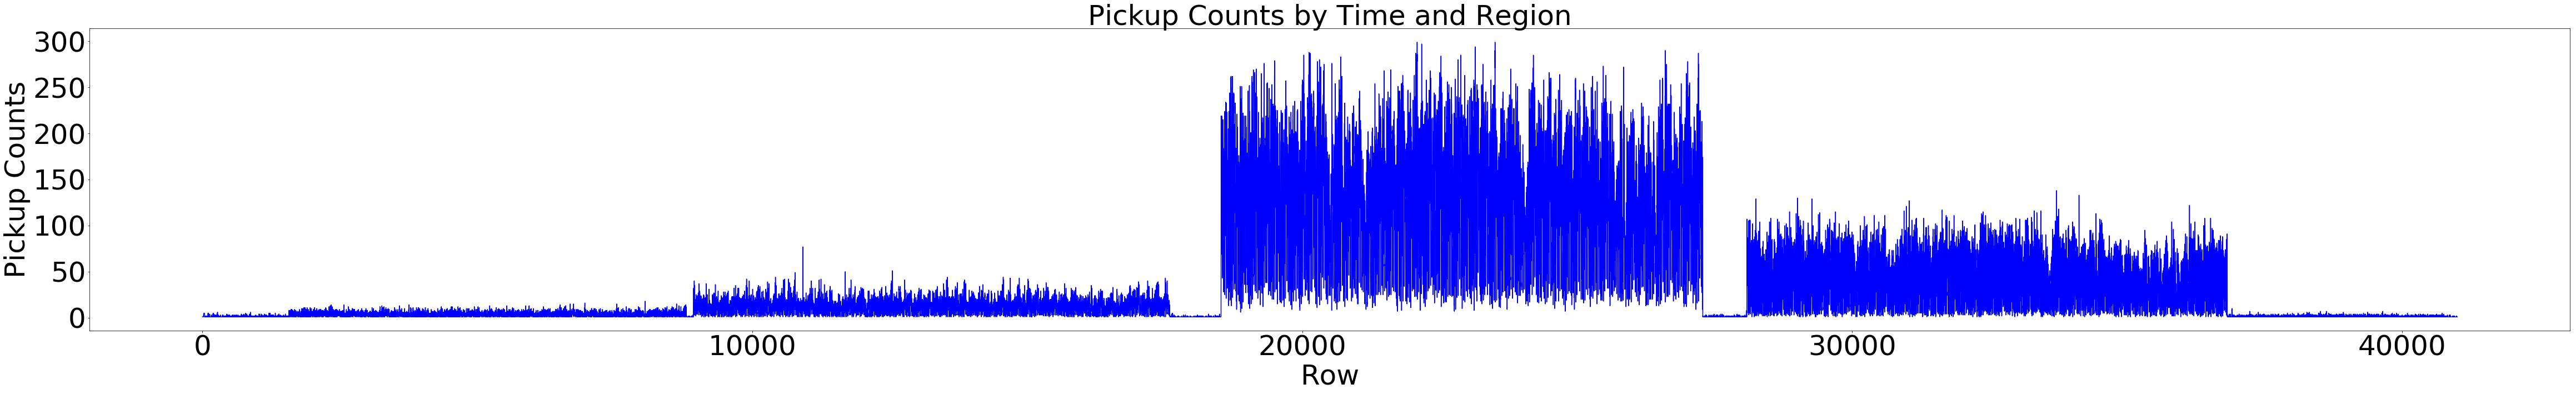

In [14]:
cnt = aggregated['count']
plt.figure(figsize=(80,10))
plt.plot(cnt,'b')
plt.xlabel('Row', size=50)
plt.ylabel('Pickup Counts', size=50)
plt.title('Pickup Counts by Time and Region', size=50)
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()

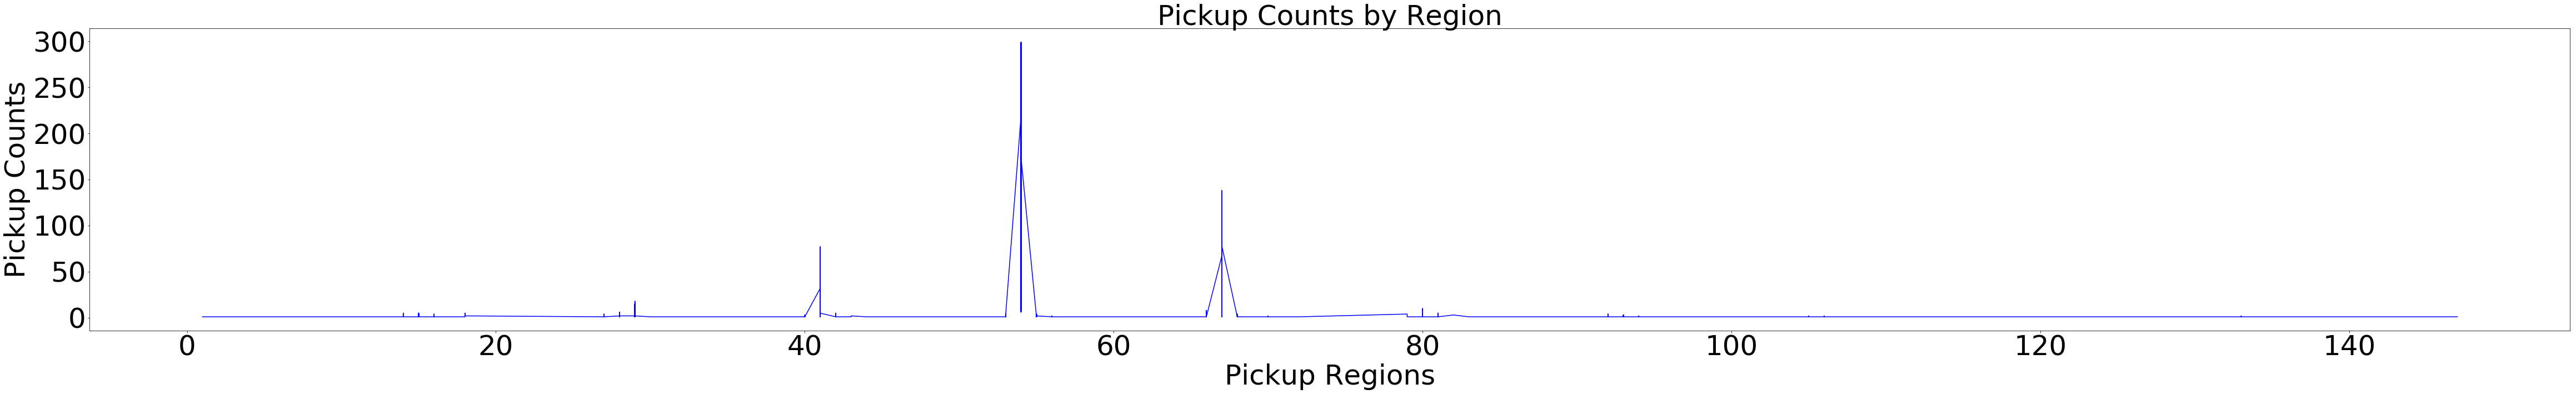

In [15]:
plt.figure(figsize=(80,10))
pickup_region = aggregated['pickup_region']
plt.plot(pickup_region, cnt, 'b')
plt.xlabel('Pickup Regions', size =50)
plt.ylabel('Pickup Counts', size =50)
plt.title('Pickup Counts by Region', size =50)
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()

In [16]:
plt.figure(figsize=(80,10))
pickup_datetime_parsed = aggregated['pickup_datetime_parsed']
plt.plot(pickup_datetime_parsed, cnt,'b')
plt.xlabel('One-Hour Timeframe', size = 50);
plt.ylabel('Pickup Counts', size = 50);
plt.title('Pickup Counts by Hourly Timeframe', size = 50)
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()

ValueError: could not convert string to float: '2013 5 25 12'

In [17]:
plt.figure(figsize=(80,10))
plt.plot(aggregated.iloc[0:8000, 1], aggregated.iloc[0:8000, 2],'b')
plt.xlabel('One-Hour Timeframe', size = 50)
plt.ylabel('Pickup Counts', size = 50)
plt.title('Pickup Counts by Hourly Timeframe', size = 50)
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()

ValueError: could not convert string to float: '2013 8 28 6'

#### Adding New Features - Determination of whether the given date is holiday or not 

In [18]:
# Creating new columns to state if it is holiday or weekend
aggregated["is_holiday"] = aggregated.pickup_datetime_parsed 
aggregated["is_weekend"] = aggregated.pickup_datetime_parsed 
aggregated.head(3)

,pickup_region,pickup_datetime_parsed,count,is_holiday,is_weekend
0,1.0,2013 1 4 2,1,2013 1 4 2,2013 1 4 2
1,1.0,2013 9 27 0,1,2013 9 27 0,2013 9 27 0
2,1.0,2013 9 27 1,1,2013 9 27 1,2013 9 27 1


In [19]:
# Creating the function to determine whether it is holiday
def is_holiday(x):
    if x[6] == ' ':
        if x[8] == ' ':
            a = datetime.datetime(int(x[0:4]), int(x[5:6]), int(x[7:8]))
        elif x[9] == ' ':
            a = datetime.datetime(int(x[0:4]), int(x[5:6]), int(x[7:9]))
        else:
            print(f'There was an error processing the following: {x}')
    elif x[7] == ' ':
        if x[9] == ' ':
            a = datetime.datetime(int(x[0:4]), int(x[5:7]), int(x[8:9]))
        elif x[10] == ' ':
            a = datetime.datetime(int(x[0:4]), int(x[5:7]), int(x[8:10]))
        else:
            print(f'There was an error processing the following: {x}')
    else:
        print(f'There was an error processing the following: {x}')
    
    try:
        a
    except NameError:
        pass
    else:
        year = a.year
        if a.month < 10:
            if a.day < 10:
                date = f'{a.year}-0{a.month}-0{a.day}'
            else:
                date = f'{a.year}-0{a.month}-{a.day}'
        else:
            date = f'{a.year}-{a.month}-{a.day}'
        
        static_holidays = ['01-01', '02-14', '03-17', '07-04', '10-31', '12-24', '12-25', '12-31']

        holidays = [f'{year}-{y[:2]}-{y[3:]}' for y in static_holidays]

        thanksgiving_dates = [22, 23, 24, 25, 26, 27, 28]
        for x in thanksgiving_dates:
            if datetime.datetime(int(year), 11, x).weekday() == 3:
                thanksgiving = f'{year}-11-{x}'
                holidays.append(thanksgiving)

        memorialday_dates = [25, 26, 27, 28, 29, 30, 31]
        for x in memorialday_dates:
            if datetime.datetime(int(year), 5, x).weekday() == 0:
                memorialday = f'{year}-05-{x}'
                holidays.append(memorialday)

        holiday = date in holidays

        if holiday == True:
            return True
        else:
            return False

In [20]:
# Test function

# Should be "true" for Christmas
print(is_holiday('2014 12 25 1'))
# Should be "true" for Memorial Day
print(is_holiday('2013 5 27 1'))
# Should be "false" for Saturday
print(is_holiday('2018 5 19 1'))
# Should be "false" for Wednesday
print(is_holiday('2017 8 2 12'))

True
True
False
False


In [21]:
aggregated["is_holiday"] = aggregated["is_holiday"].apply(is_holiday)
aggregated.head()

,pickup_region,pickup_datetime_parsed,count,is_holiday,is_weekend
0,1.0,2013 1 4 2,1,False,2013 1 4 2
1,1.0,2013 9 27 0,1,False,2013 9 27 0
2,1.0,2013 9 27 1,1,False,2013 9 27 1
3,2.0,2013 6 9 8,1,False,2013 6 9 8
4,2.0,2013 7 25 13,1,False,2013 7 25 13


#### Adding New Features - Determination of whether the given date is weekend or not 

In [22]:
# Creating the function to determine whether it is weekend 
def is_weekend(x):
    if x[6] == ' ':
        if x[8] == ' ':
            a = datetime.datetime(int(x[0:4]), int(x[5:6]), int(x[7:8]))
        elif x[9] == ' ':
            a = datetime.datetime(int(x[0:4]), int(x[5:6]), int(x[7:9]))
        else:
            print(f'There was an error processing the following: {x}')
    elif x[7] == ' ':
        if x[9] == ' ':
            a = datetime.datetime(int(x[0:4]), int(x[5:7]), int(x[8:9]))
        elif x[10] == ' ':
            a = datetime.datetime(int(x[0:4]), int(x[5:7]), int(x[8:10]))
        else:
            print(f'There was an error processing the following: {x}')
    else:
        print(f'There was an error processing the following: {x}')
    
    try:
        a
    except NameError:
        pass
    else:
        year = a.year
        if a.month < 10:
            if a.day < 10:
                date = f'{a.year}-0{a.month}-0{a.day}'
            else:
                date = f'{a.year}-0{a.month}-{a.day}'
        else:
            date = f'{a.year}-{a.month}-{a.day}'
            
            
        if a.weekday() in [5, 6]:
            weekend = True
        else:
            weekend = False
         
        if weekend == True:
            return True
        else:
            return False

In [23]:
# Test function

# Should be "false" for Christmas (Thursday)
print(is_weekend('2014 12 25 1'))
# Should be "false" for Memorial Day (Monday)
print(is_weekend('2013 5 27 1'))
# Should be "true" for Saturday
print(is_weekend('2018 5 19 1'))
# Should be "false" for Wednesday
print(is_weekend('2017 8 2 12'))

False
False
True
False


In [49]:
aggregated["is_weekend"] = aggregated["is_weekend"].apply(is_weekend)
aggregated.head()

,pickup_region,pickup_datetime_parsed,count,is_holiday,is_weekend,year,month,day,hour,weekDay
0,1.0,2013 1 4 2,1,False,False,2013,1,4,2,Friday
1,1.0,2013 9 27 0,1,False,False,2013,9,27,0,Friday
2,1.0,2013 9 27 1,1,False,False,2013,9,27,1,Friday
3,2.0,2013 6 9 8,1,False,True,2013,6,9,8,Sunday
4,2.0,2013 7 25 13,1,False,False,2013,7,25,13,Thursday


#### Adding New Features - Extracting the 'Year', 'Month', 'Day', 'Hour' out of the date

In [50]:
def findYear(x): 
    a = int(x[0:4])
    return a 

In [51]:
def findMonth(x):  
    if x[6] == ' ':
        a = (int(x[5:6]))
    elif x[7] == ' ':
        a = (int(x[5:7]))
    else:
        print(f'There was an error processing the following: {x}')          
    return a

In [52]:
def findDay(x):  
    if x[6] == ' ':
        if x[8] == ' ':
            a = (int(x[7:8]))
        elif x[9] == ' ':
            a = (int(x[7:9]))
        else:
            print(f'There was an error processing the following: {x}') 
    if x[7] == ' ':
        if x[9] == ' ':
            a = (int(x[8:9]))
        elif x[10] == ' ':
            a = (int(x[8:10]))
        else:
            print(f'There was an error processing the following: {x}')    
    return a

In [53]:
def findHour(x):  
    if len(x) == 10:       
        if x[8] == ' ':
            a = (int(x[9:10]))
        else:
            print(f'There was an error processing the following: {x}')
    if len(x) == 11:    
        if x[8] == ' ':
            a = (int(x[9:11]))        
        elif x[9] == ' ':
            a = (int(x[10:11]))
        elif x[10] == ' ':
            a = (int(x[8:10]))            
        else:
            print(f'There was an error processing the following: {x}')        
    if len(x) == 12:    
        if x[9] == ' ':
            a = (int(x[10:12]))     
        elif x[10] == ' ':
            a = (int(x[11:12]))                   
        else:
            print(f'There was an error processing the following: {x}')                 
    if len(x) == 13:  
        if x[10] == ' ':
            a = (int(x[11:13]))
        else:
            print(f'There was an error processing the following: {x}')    
    return a

In [54]:
aggregated["year"] = aggregated.pickup_datetime_parsed 
aggregated["month"] = aggregated.pickup_datetime_parsed 
aggregated["day"] = aggregated.pickup_datetime_parsed 
aggregated["hour"] = aggregated.pickup_datetime_parsed 

In [55]:
aggregated["year"] = aggregated["year"].apply(findYear)
aggregated["month"] = aggregated["month"].apply(findMonth)
aggregated["day"] = aggregated["day"].apply(findDay)
aggregated["hour"] = aggregated["hour"].apply(findHour)

aggregated.head()

,pickup_region,pickup_datetime_parsed,count,is_holiday,is_weekend,year,month,day,hour,weekDay
0,1.0,2013 1 4 2,1,False,False,2013,1,4,2,Friday
1,1.0,2013 9 27 0,1,False,False,2013,9,27,0,Friday
2,1.0,2013 9 27 1,1,False,False,2013,9,27,1,Friday
3,2.0,2013 6 9 8,1,False,True,2013,6,9,8,Sunday
4,2.0,2013 7 25 13,1,False,False,2013,7,25,13,Thursday


#### Adding New Features - Determination of what day the date corresponds to

In [56]:
def weekDay(date):
    year = findYear(date)
    month = findMonth(date)
    day = findDay(date)
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux // 4 - aux // 100 + (aux + 100) // 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return week[dayOfWeek] 

In [57]:
aggregated["weekDay"] = aggregated.pickup_datetime_parsed 

In [58]:
aggregated["weekDay"] = aggregated["weekDay"].apply(weekDay)
aggregated.head()

,pickup_region,pickup_datetime_parsed,count,is_holiday,is_weekend,year,month,day,hour,weekDay
0,1.0,2013 1 4 2,1,False,False,2013,1,4,2,Friday
1,1.0,2013 9 27 0,1,False,False,2013,9,27,0,Friday
2,1.0,2013 9 27 1,1,False,False,2013,9,27,1,Friday
3,2.0,2013 6 9 8,1,False,True,2013,6,9,8,Sunday
4,2.0,2013 7 25 13,1,False,False,2013,7,25,13,Thursday


In [108]:
plt.figure(figsize=(80,10))
plt.bar(aggregated['month'], cnt)
plt.xlabel('Month', size = 50)
plt.ylabel('Pickup Counts', size = 50)
plt.title('Pickup Counts by Month', size = 50)
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()

KeyError: 20121

In [63]:
plt.figure(figsize=(80,10))
plt.bar(aggregated['day'], cnt)
plt.xlabel('Day', size = 50)
plt.ylabel('Pickup Counts', size = 50)
plt.title('Pickup Counts by Day', size = 50)
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()

KeyError: 20121

In [64]:
plt.figure(figsize=(80,10))
plt.bar(aggregated['hour'], cnt)
plt.xlabel('Hour', size = 50)
plt.ylabel('Pickup Counts', size = 50)
plt.title('Pickup Counts by Hour', size = 50)
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()

KeyError: 20121

In [65]:
plt.figure(figsize=(80,10))
plt.bar(aggregated['weekDay'], cnt)
plt.xlabel('Weekday', size = 50)
plt.ylabel('Pickup Counts', size = 50)
plt.title('Pickup Counts by the Day', size = 50)
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

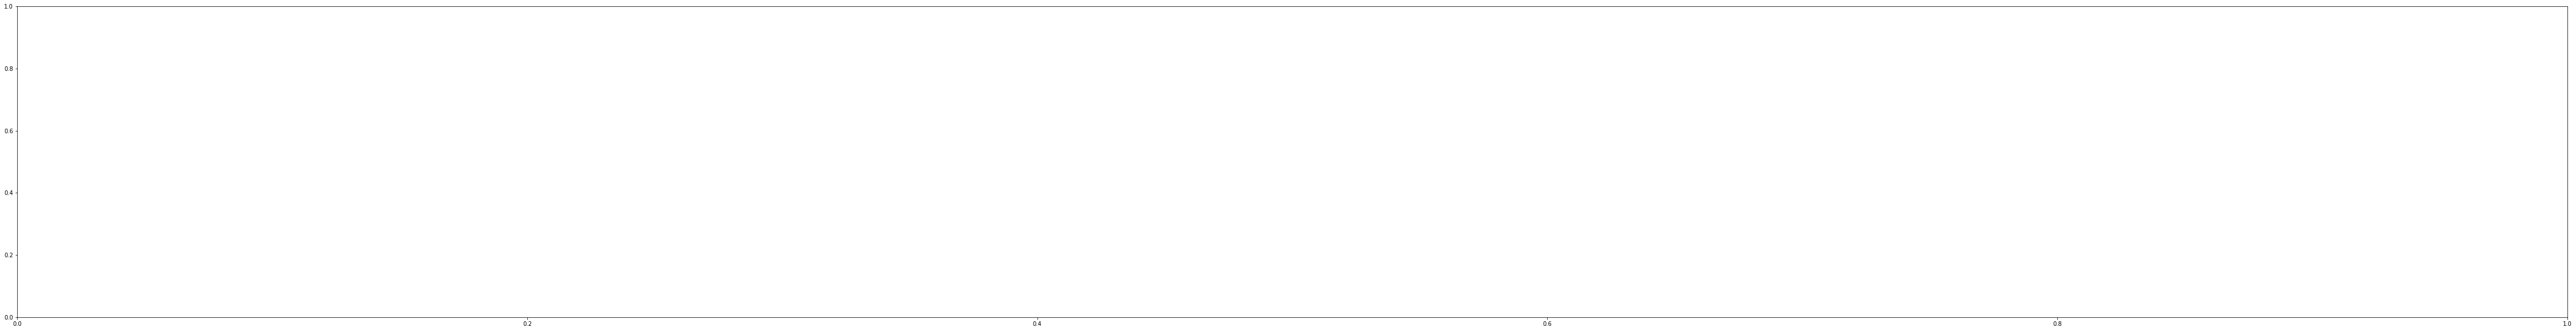

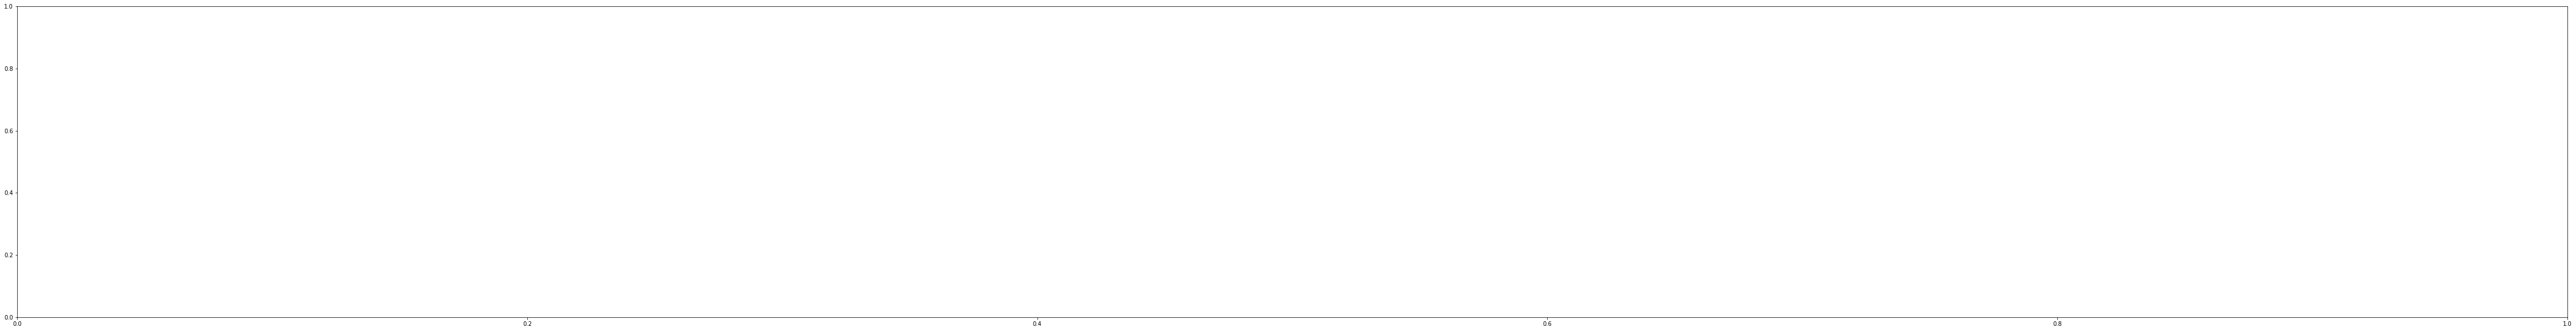

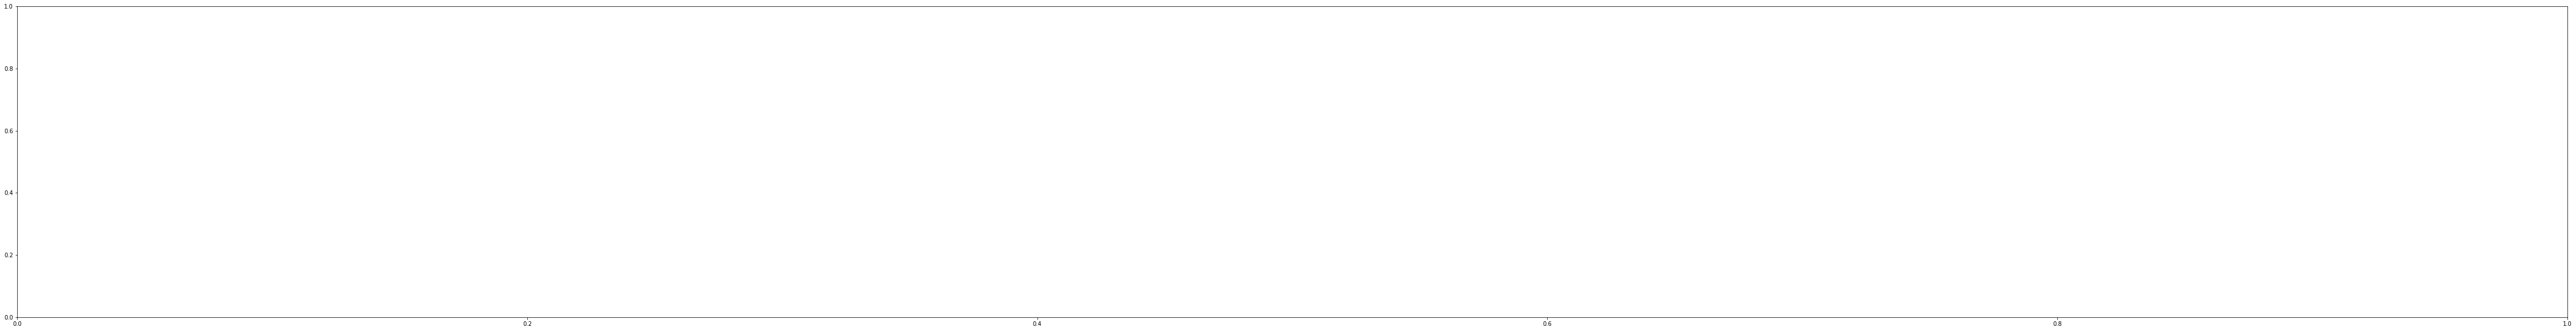

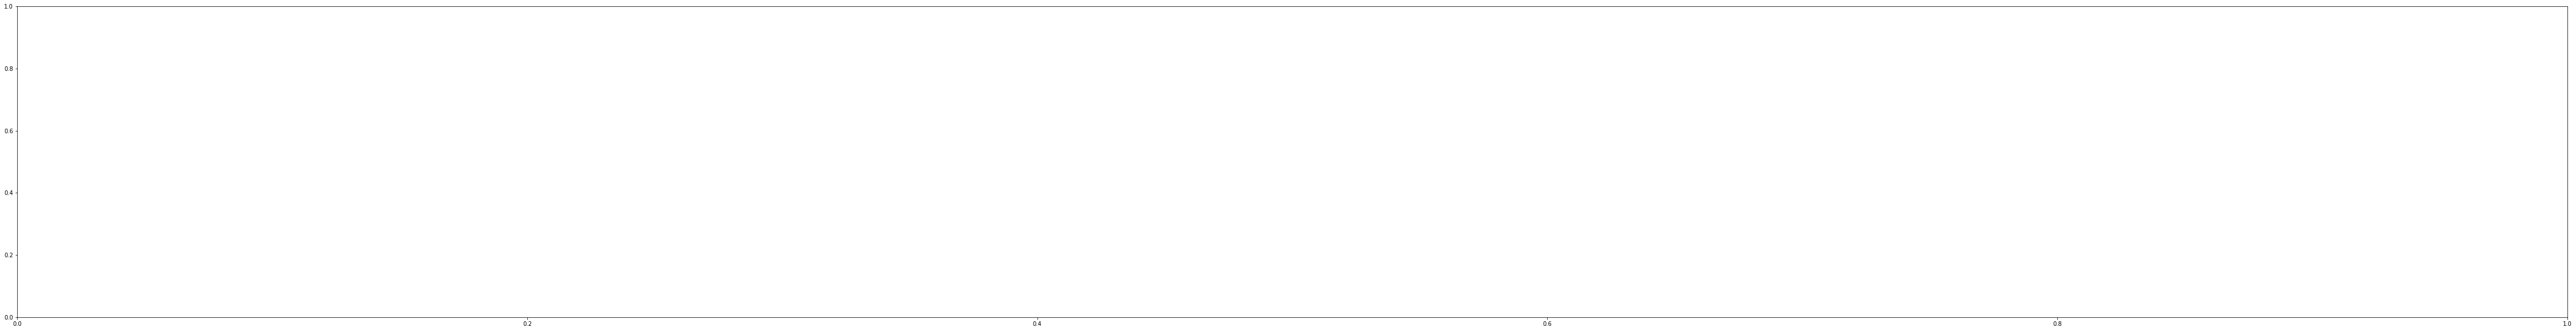

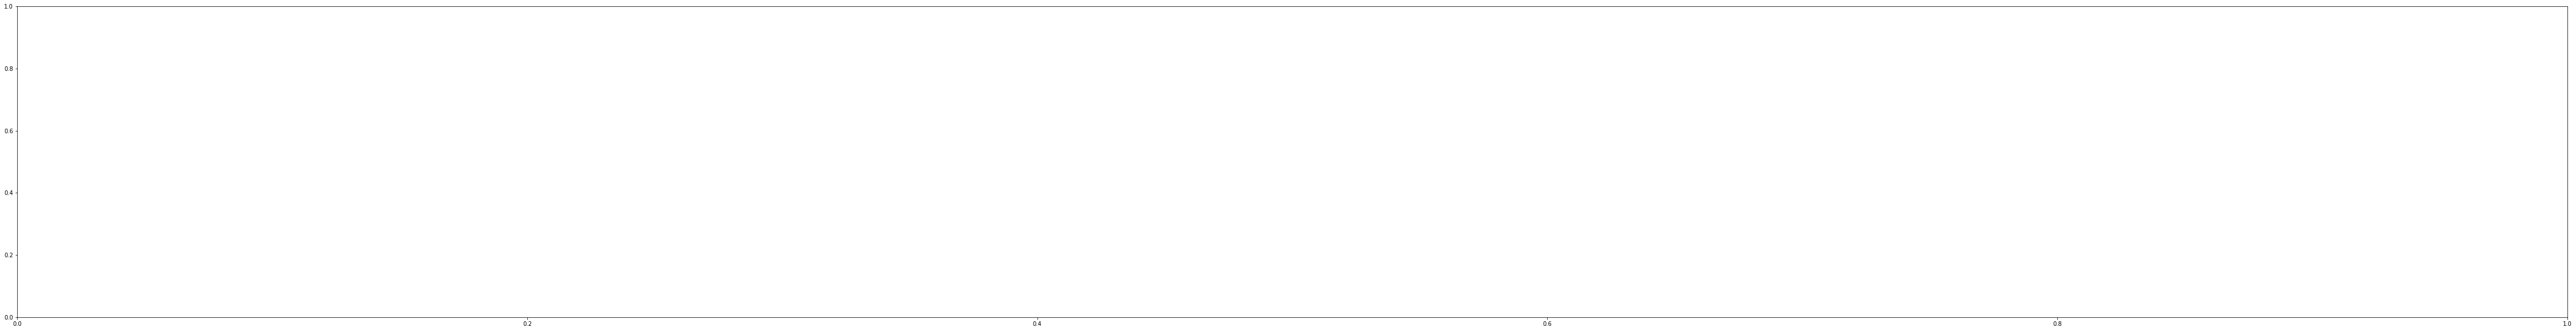

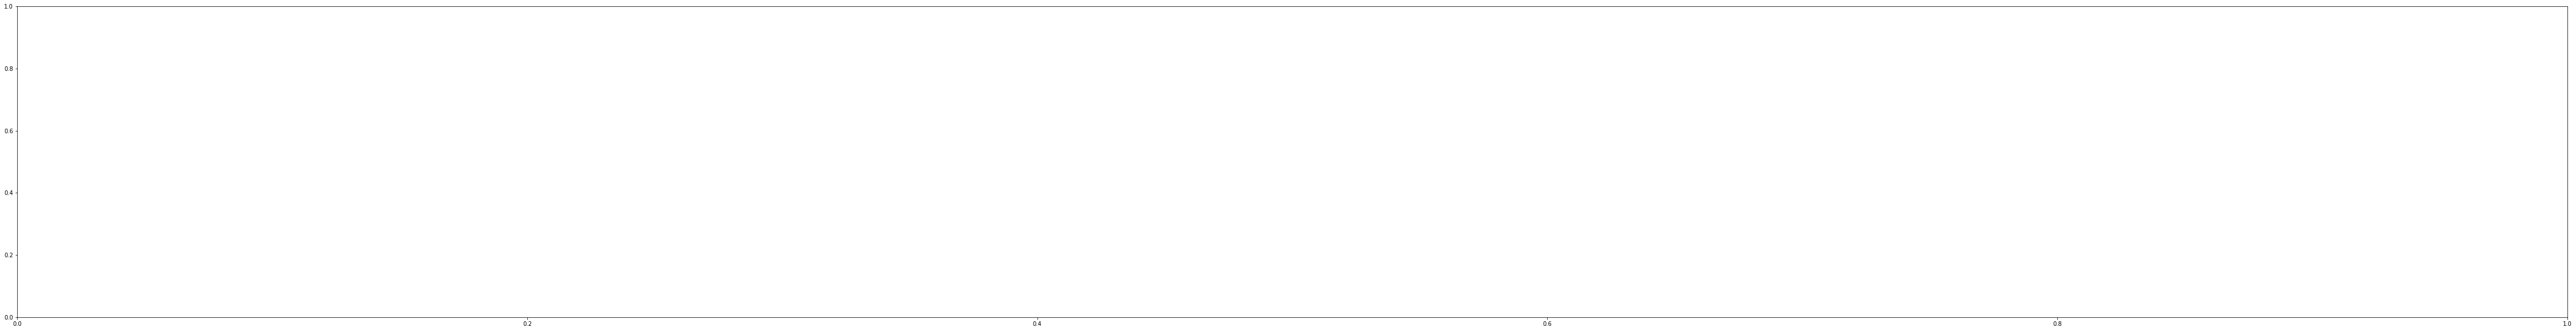

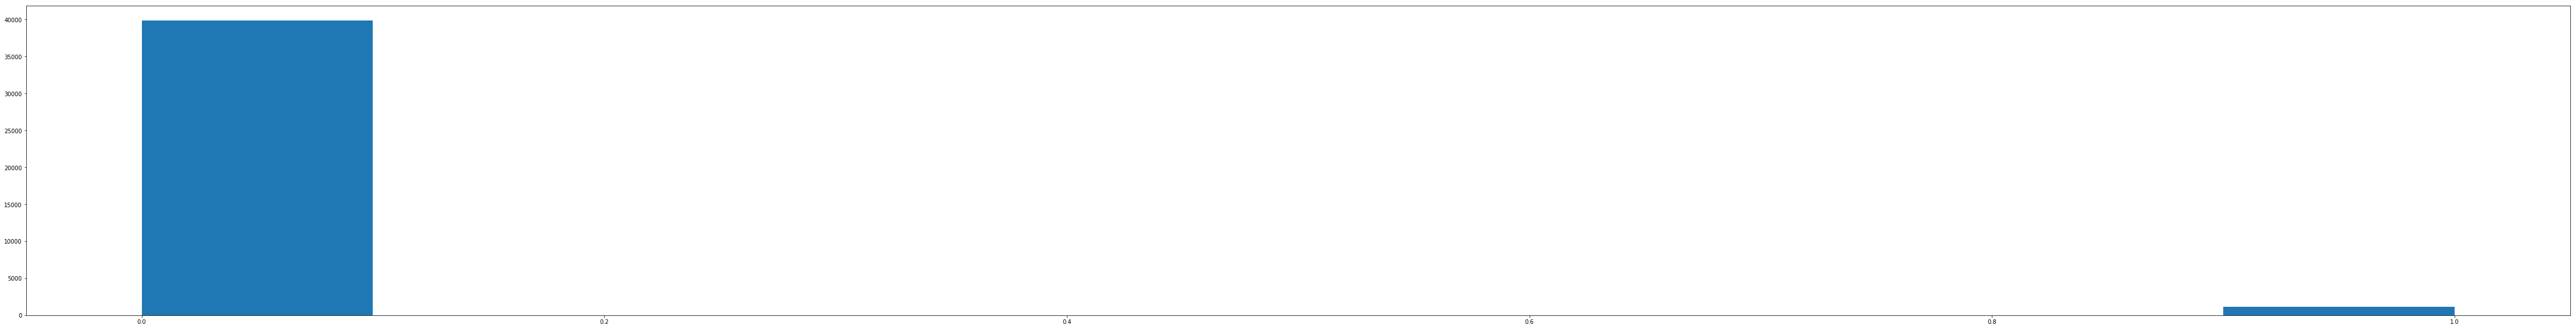

In [66]:
plt.hist(aggregated['is_holiday'])
plt.show()

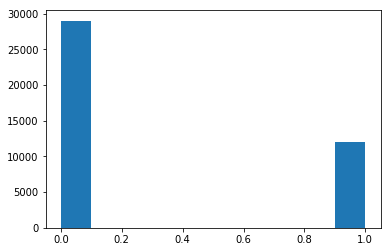

In [67]:
plt.hist(aggregated['is_weekend'])
plt.show()

#### Loading and Merging the Weather Data (obtained from NOAA) 

In [68]:
# Load in the weather data 
weather = pd.read_csv("/Users/christian.woodruff/Documents/Data_Science/DS420/Datasets/weather_data.csv")

In [69]:
data = pd.merge(aggregated, weather, on=['year', 'month', 'day', 'hour'])
data.head()

,pickup_region,pickup_datetime_parsed,count,is_holiday,is_weekend,year,month,day,hour,weekDay,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,DAILYSunrise,DAILYSunset
0,1.0,2013 1 4 2,1,False,False,2013,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
1,29.0,2013 1 4 2,1,False,False,2013,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
2,41.0,2013 1 4 2,3,False,False,2013,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
3,54.0,2013 1 4 2,47,False,False,2013,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
4,67.0,2013 1 4 2,6,False,False,2013,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16


In [70]:
data.describe()

,pickup_region,count,year,month,day,hour,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,DAILYSunrise,DAILYSunset
count,51696.000000,51696.000000,51696.0,51696.000000,51696.000000,51696.000000,51691.000000,51691.000000,51633.000000,51633.000000,51691.000000,51691.000000,51691.000000,48717.000000,51696.000000,51696.000000
mean,51.045013,41.490328,2013.0,6.511955,15.502979,11.789848,55.126985,12.848010,49.315341,9.618585,42.759126,5.978507,66.032540,5.558717,5.342560,17.563254
std,16.901762,58.392520,0.0,3.444295,8.705847,6.857296,17.366703,9.648316,16.221908,9.006571,19.277952,10.709596,19.859764,3.746798,1.097462,1.124507
min,1.000000,1.000000,2013.0,1.000000,1.000000,0.000000,11.000000,-11.700000,8.000000,-13.300000,-8.000000,-22.200000,15.000000,0.000000,4.000000,16.000000
25%,41.000000,3.000000,2013.0,4.000000,8.000000,6.000000,40.000000,4.400000,35.000000,1.900000,28.000000,-2.200000,50.000000,3.000000,4.000000,17.000000
50%,54.000000,12.000000,2013.0,6.000000,15.000000,12.000000,57.000000,13.900000,50.000000,10.200000,44.000000,6.700000,66.000000,6.000000,5.000000,18.000000
75%,67.000000,62.000000,2013.0,10.000000,23.000000,18.000000,70.000000,21.100000,63.000000,17.200000,59.000000,15.000000,84.000000,8.000000,6.000000,19.000000
max,147.000000,299.000000,2013.0,12.000000,31.000000,23.000000,97.000000,36.100000,79.000000,26.300000,76.000000,24.400000,100.000000,24.000000,7.000000,19.000000


####  Replacing Missing Data with the Median Value

In [71]:
data.isnull().sum()

pickup_region                0
pickup_datetime_parsed       0
count                        0
is_holiday                   0
is_weekend                   0
year                         0
month                        0
day                          0
hour                         0
weekDay                      0
HOURLYDRYBULBTEMPF           5
HOURLYDRYBULBTEMPC           5
HOURLYWETBULBTEMPF          63
HOURLYWETBULBTEMPC          63
HOURLYDewPointTempF          5
HOURLYDewPointTempC          5
HOURLYRelativeHumidity       5
HOURLYWindSpeed           2979
DAILYSunrise                 0
DAILYSunset                  0
dtype: int64

In [72]:
data = data.fillna(data.median())

In [73]:
data.isnull().sum().sum()

0

In [74]:
# Dropping the Pickup_datetime_parsed and Year(always 2013) columns as they are not needed anymore 
data = data.drop('pickup_datetime_parsed', axis=1)
data = data.drop('year', axis=1)
data.head(2)

,pickup_region,count,is_holiday,is_weekend,month,day,hour,weekDay,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,DAILYSunrise,DAILYSunset
0,1.0,1,False,False,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
1,29.0,1,False,False,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16


#### Converting Categorical Values into Numeric Values 

In [75]:
data['is_holiday'] = data['is_holiday'].astype(int)
data['is_weekend'] = data['is_weekend'].astype(int)
data.head()

,pickup_region,count,is_holiday,is_weekend,month,day,hour,weekDay,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,DAILYSunrise,DAILYSunset
0,1.0,1,0,0,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
1,29.0,1,0,0,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
2,41.0,3,0,0,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
3,54.0,47,0,0,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
4,67.0,6,0,0,1,4,2,Friday,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16


In [76]:
data.loc[data['weekDay'] == 'Monday', 'weekDay'] = 1
data.loc[data['weekDay'] == 'Tuesday', 'weekDay'] = 2
data.loc[data['weekDay'] == 'Wednesday', 'weekDay'] = 3
data.loc[data['weekDay'] == 'Thursday', 'weekDay'] = 4
data.loc[data['weekDay'] == 'Friday', 'weekDay'] = 5
data.loc[data['weekDay'] == 'Saturday', 'weekDay'] = 6
data.loc[data['weekDay'] == 'Sunday', 'weekDay'] = 7
data.head()

,pickup_region,count,is_holiday,is_weekend,month,day,hour,weekDay,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,DAILYSunrise,DAILYSunset
0,1.0,1,0,0,1,4,2,5,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
1,29.0,1,0,0,1,4,2,5,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
2,41.0,3,0,0,1,4,2,5,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
3,54.0,47,0,0,1,4,2,5,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16
4,67.0,6,0,0,1,4,2,5,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16


#### Scaling the Dataset

In [77]:
cols = list(data.columns.values)
cols

['pickup_region',
 'count',
 'is_holiday',
 'is_weekend',
 'month',
 'day',
 'hour',
 'weekDay',
 'HOURLYDRYBULBTEMPF',
 'HOURLYDRYBULBTEMPC',
 'HOURLYWETBULBTEMPF',
 'HOURLYWETBULBTEMPC',
 'HOURLYDewPointTempF',
 'HOURLYDewPointTempC',
 'HOURLYRelativeHumidity',
 'HOURLYWindSpeed',
 'DAILYSunrise',
 'DAILYSunset']

In [78]:
# Reordering the Dataset
data = data[[
 'pickup_region',
 'is_holiday',
 'is_weekend',
 'month',
 'day',
 'hour',
 'weekDay',
 'HOURLYDRYBULBTEMPF',
 'HOURLYDRYBULBTEMPC',
 'HOURLYWETBULBTEMPF',
 'HOURLYWETBULBTEMPC',
 'HOURLYDewPointTempF',
 'HOURLYDewPointTempC',
 'HOURLYRelativeHumidity',
 'HOURLYWindSpeed',
 'DAILYSunrise',
 'DAILYSunset', 
 'count',
]]
data.head(2)

,pickup_region,is_holiday,is_weekend,month,day,hour,weekDay,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,DAILYSunrise,DAILYSunset,count
0,1.0,0,0,1,4,2,5,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16,1
1,29.0,0,0,1,4,2,5,31.0,-0.6,27.0,-2.8,19.0,-7.2,61.0,3.0,7,16,1


In [79]:
# Creating a list of columns that will be scaled (excluding the label column - count -)
columns = ['pickup_region',
 'is_holiday',
 'is_weekend',
 'month',
 'day',
 'hour',
 'weekDay',
 'HOURLYDRYBULBTEMPF',
 'HOURLYDRYBULBTEMPC',
 'HOURLYWETBULBTEMPF',
 'HOURLYWETBULBTEMPC',
 'HOURLYDewPointTempF',
 'HOURLYDewPointTempC',
 'HOURLYRelativeHumidity',
 'HOURLYWindSpeed',
 'DAILYSunrise',
 'DAILYSunset']

In [80]:
# Converting each column to numeric 
for each in columns: 
    data[each] = pd.to_numeric(data[each])

In [81]:
for each in columns: 
    mean, std = data[each].mean(), data[each].std()
    data.loc[:, each] = (data[each] - mean)/std

data.head(3)

,pickup_region,is_holiday,is_weekend,month,day,hour,weekDay,HOURLYDRYBULBTEMPF,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYDewPointTempF,HOURLYDewPointTempC,HOURLYRelativeHumidity,HOURLYWindSpeed,DAILYSunrise,DAILYSunset,count
0,-2.960935,-0.158569,-0.63295,-1.600314,-1.321294,-1.427654,0.496621,-1.389344,-1.393897,-1.376519,-1.379752,-1.232516,-1.230598,-0.253416,-0.710185,1.510248,-1.390169,1
1,-1.304303,-0.158569,-0.63295,-1.600314,-1.321294,-1.427654,0.496621,-1.389344,-1.393897,-1.376519,-1.379752,-1.232516,-1.230598,-0.253416,-0.710185,1.510248,-1.390169,1
2,-0.594318,-0.158569,-0.63295,-1.600314,-1.321294,-1.427654,0.496621,-1.389344,-1.393897,-1.376519,-1.379752,-1.232516,-1.230598,-0.253416,-0.710185,1.510248,-1.390169,3


#### Splitting Data into Train and Test sets

In [82]:
msk = np.random.rand(data.shape[0]) <= 0.8

In [83]:
data_train = data.iloc[msk, 0:17] 
data_train_target = data.iloc[msk, 17] 
data_test = data.iloc[~msk, 0:17]
data_test_target = data.iloc[~msk, 17] 

len(data_train), len(data_test)

(41233, 10463)

#### Feature Engineering 

In [84]:
# Import 'RandomForestClassifier'
from sklearn.ensemble import RandomForestClassifier

In [85]:
# Build the model
names = data.columns.values
rfc = RandomForestClassifier()
rfc.fit(data_train.astype(str), data_train_target.astype(str))

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.22289999999999999, 'pickup_region'), (0.1149, 'hour'), (0.074700000000000003, 'HOURLYWindSpeed'), (0.072800000000000004, 'HOURLYRelativeHumidity'), (0.071800000000000003, 'HOURLYWETBULBTEMPC'), (0.0591, 'day'), (0.058700000000000002, 'HOURLYDRYBULBTEMPC'), (0.057099999999999998, 'HOURLYDewPointTempC'), (0.056300000000000003, 'HOURLYDRYBULBTEMPF'), (0.055399999999999998, 'HOURLYDewPointTempF'), (0.048800000000000003, 'HOURLYWETBULBTEMPF'), (0.034299999999999997, 'weekDay'), (0.033000000000000002, 'month'), (0.0178, 'DAILYSunset'), (0.016799999999999999, 'DAILYSunrise'), (0.0033, 'is_weekend'), (0.0023, 'is_holiday')]


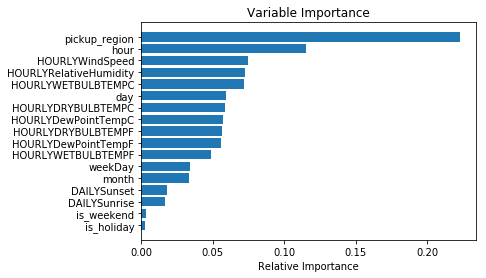

In [86]:
# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

#### Building the Decision Tree Regression Model

In [110]:
# Import the libraries
from sklearn import tree 
from sklearn import ensemble 
from sklearn import cross_validation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets, metrics
from matplotlib import pyplot as plt 

/Users/christian.woodruff/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [111]:
# Build the regression model
reg = DecisionTreeRegressor(max_depth=4) 
# Fit the regression model
reg.fit(data_train.astype(str), data_train_target.astype(str))
#Predict
pred = reg.predict(data_test)

In [112]:
summary=pd.DataFrame({'Actual':data_test_target, 'Predicted':pred})  
summary.head(10)  

,Actual,Predicted
1,1,2.759731
11,1,2.277778
31,1,1.298851
35,94,55.872818
41,1,13.222868
43,1,1.502135
45,2,1.298851
49,2,13.222868
51,9,1.502135
54,9,4.679503


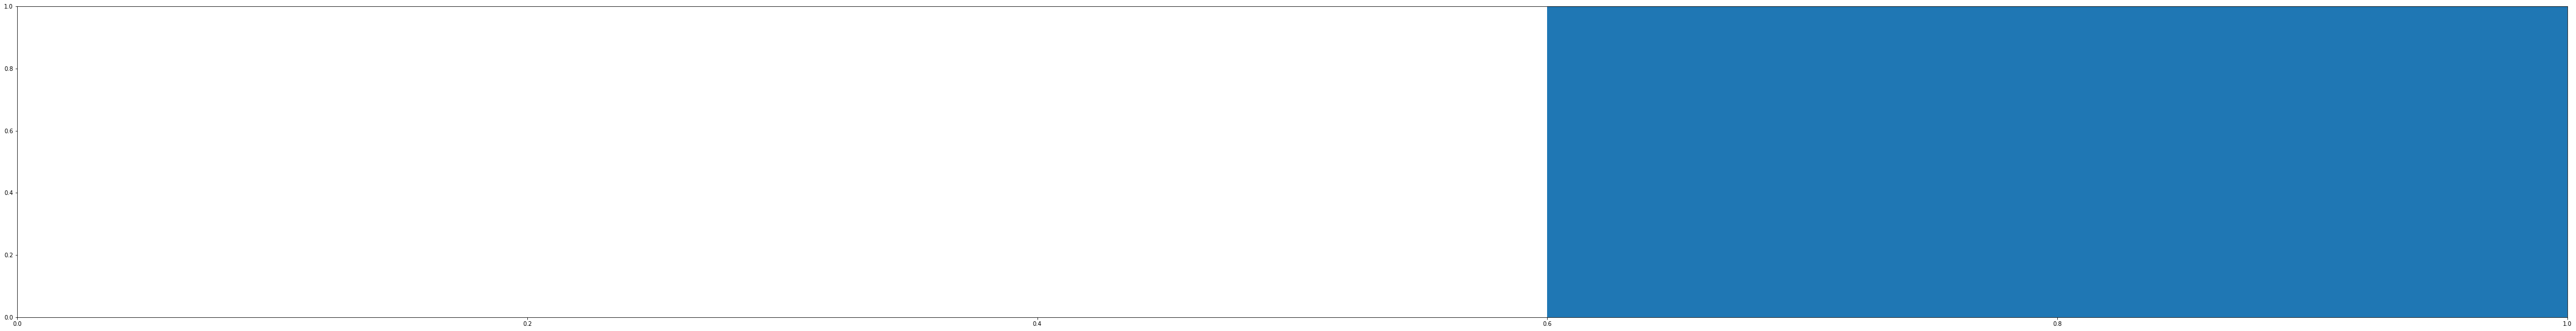

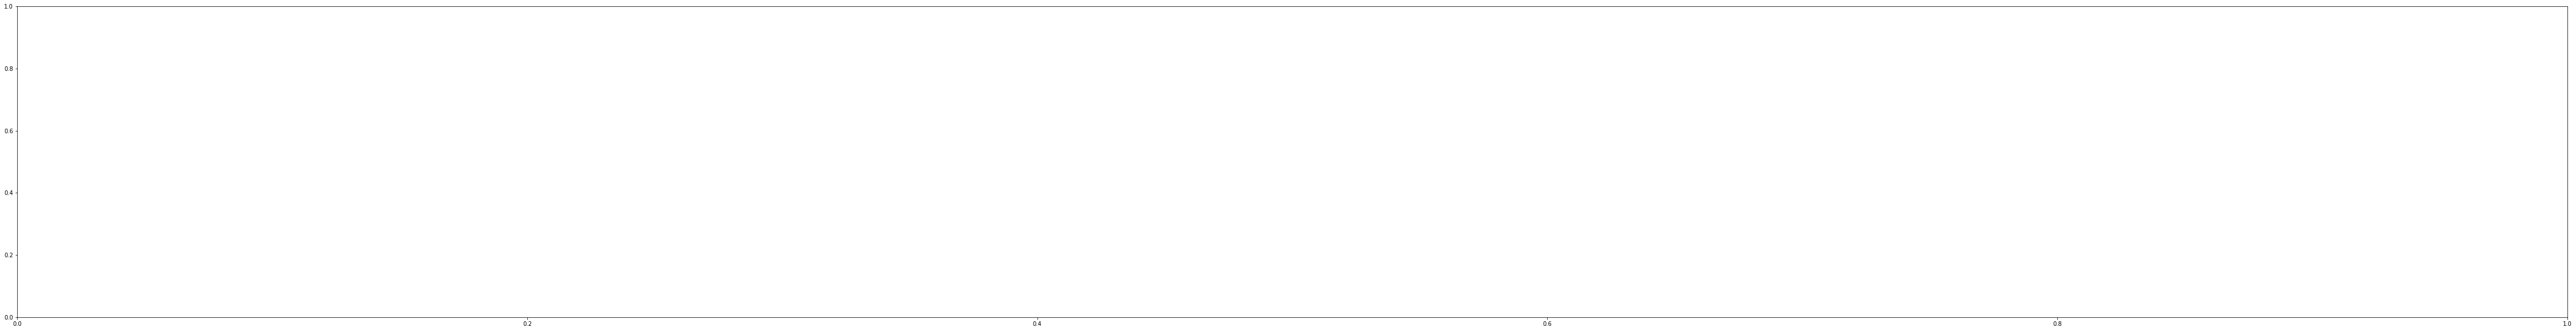

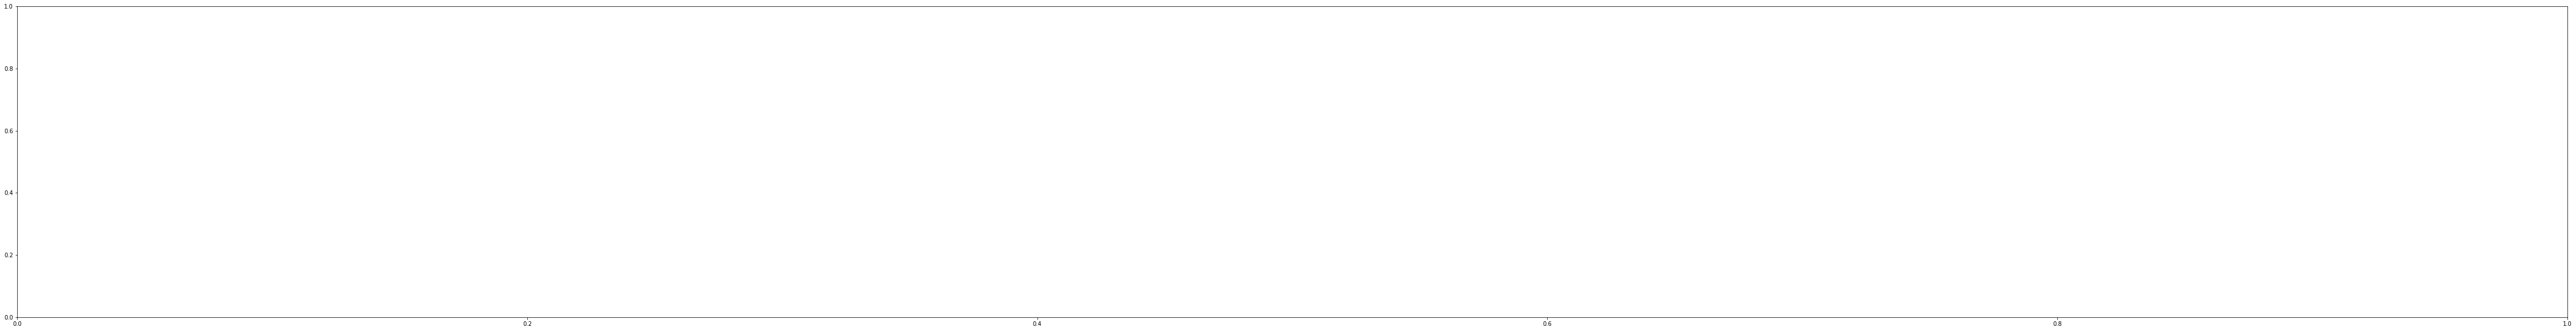

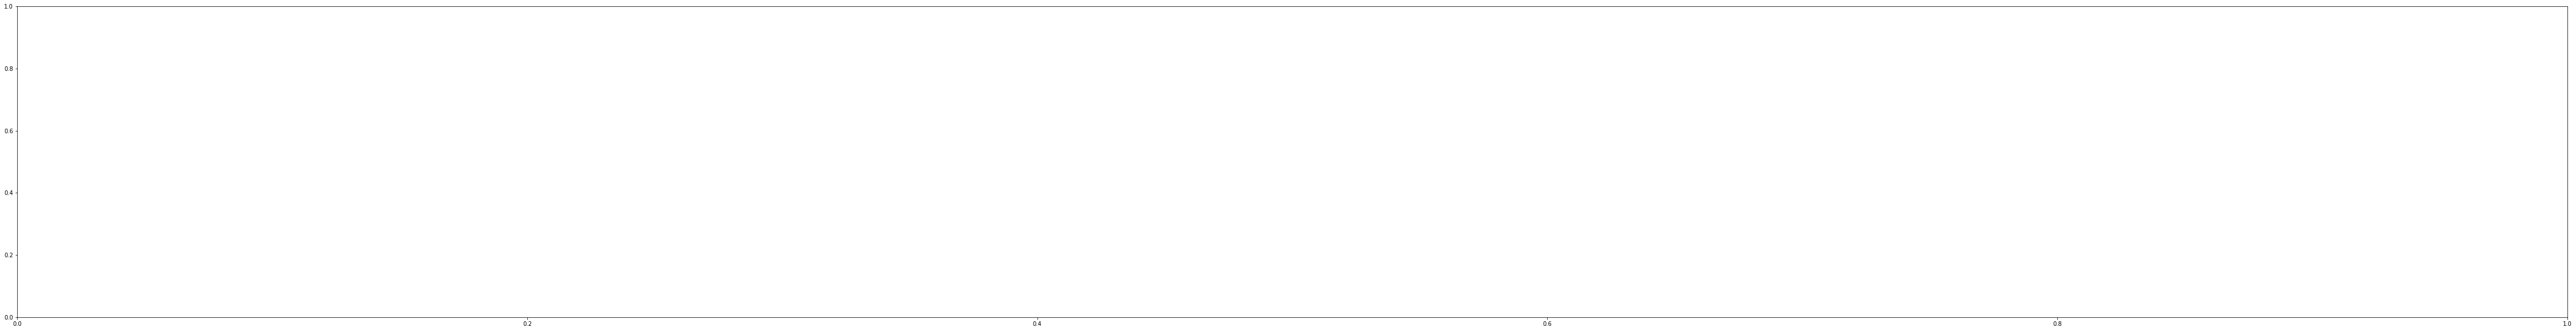

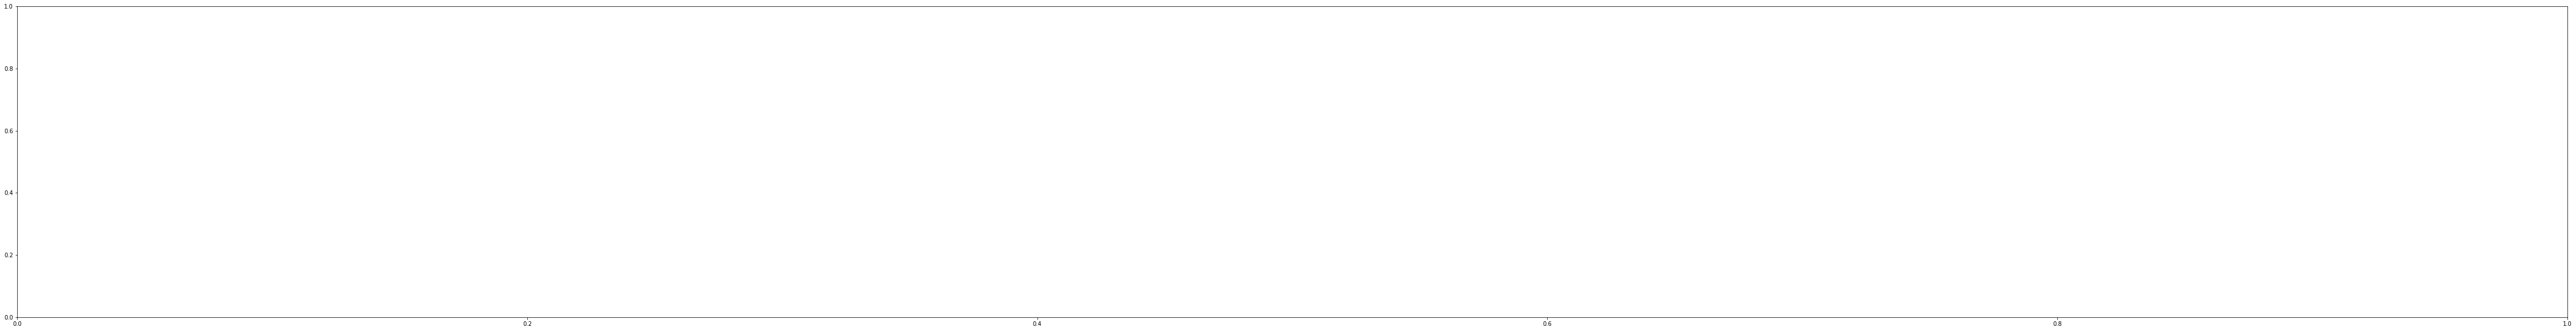

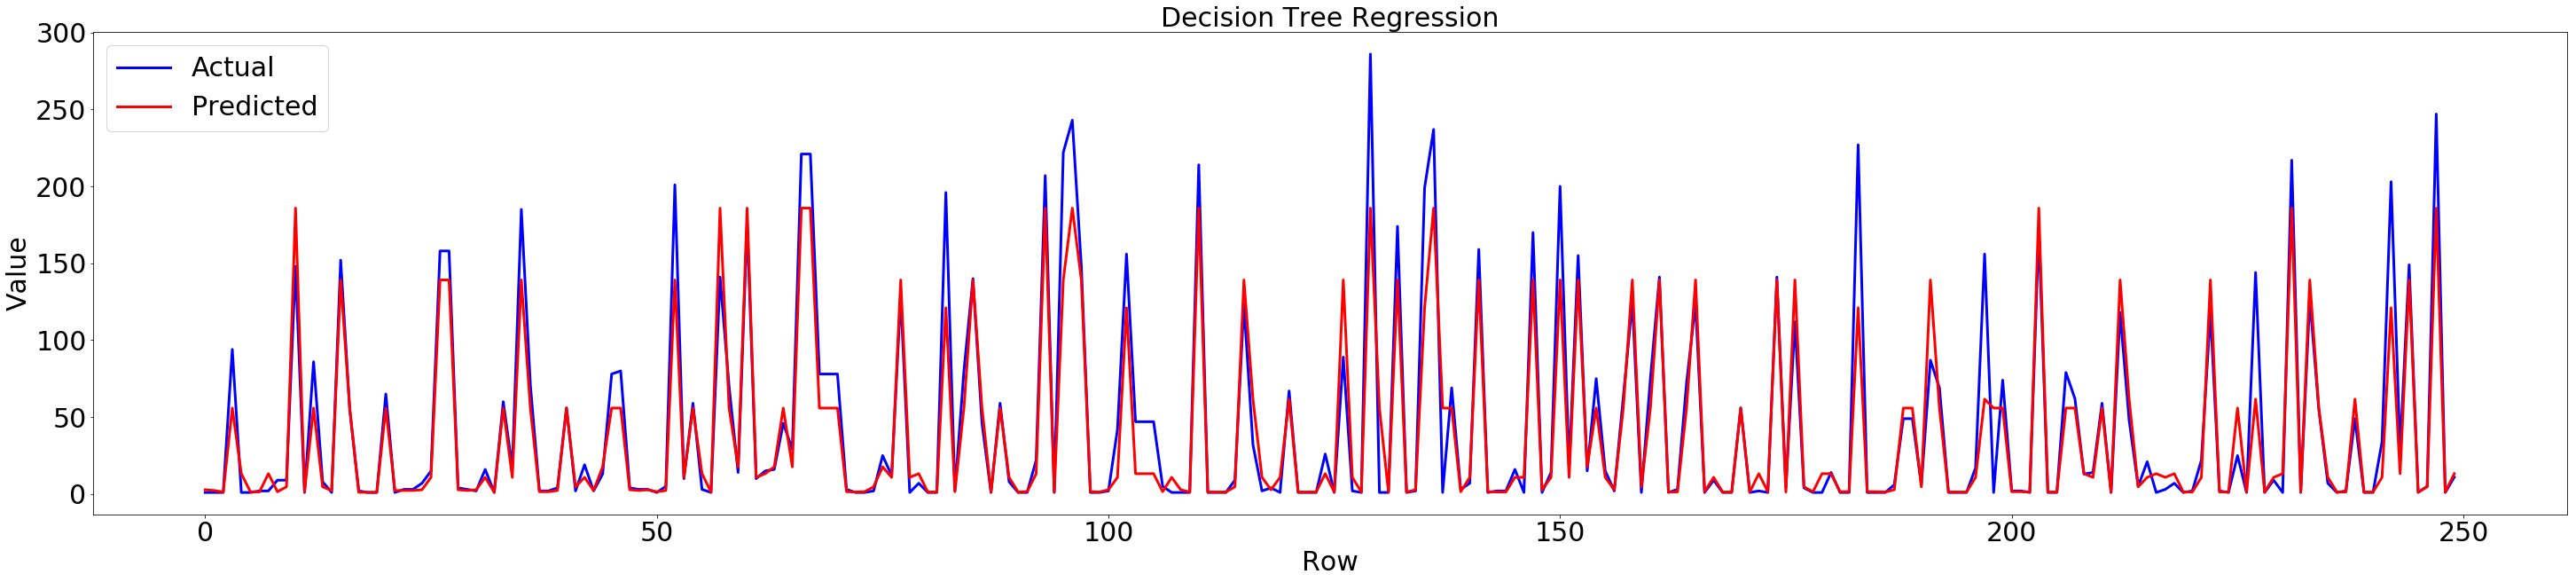

In [113]:
plt.figure(figsize=(50,10))
plt.plot(data_test_target.iloc[0:250].values, color="blue",
         label="Actual", linewidth=3)
plt.plot(pred[0:250], color="red",
         label="Predicted", linewidth=3)
plt.xlabel("Row", size= 30)
plt.ylabel("Value", size= 30)
plt.title("Decision Tree Regression", size= 30)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend(prop={'size': 30})
plt.show()

In [116]:
from sklearn import metrics
from math import sqrt 

mae = metrics.mean_absolute_error(data_test_target,pred)
mse = metrics.mean_squared_error(data_test_target,pred)
rmse = sqrt(mse) 

print('Mean Absolute Error: %.2f' % mae)  
print('Mean Squared Error : %.2f' % mse)
print('Root Mean Squared Error : %.2f' % rmse)

Mean Absolute Error: 12.72
Mean Squared Error : 531.45
Root Mean Squared Error : 23.05


In [ ]:
data_test_target.mean()

#### Building the Support Vector Machine Regression Model

In [118]:
from sklearn import svm

# Build the regression model
clf = svm.SVR()
# Fit the regression model
clf.fit(data_train.astype(str), data_train_target.astype(str))
# Predict
pred_svm = clf.predict(data_test)

In [119]:
summary1=pd.DataFrame({'Actual':data_test_target, 'Predicted using DT':pred, 'Predicted using SVM':pred_svm})  
summary1.head(10)

,Actual,Predicted using DT,Predicted using SVM
1,1,2.759731,0.998435
11,1,2.277778,-21.078535
31,1,1.298851,-26.141399
35,94,55.872818,52.031944
41,1,13.222868,32.469254
43,1,1.502135,7.211321
45,2,1.298851,2.491034
49,2,13.222868,11.737522
51,9,1.502135,11.089611
54,9,4.679503,3.352116


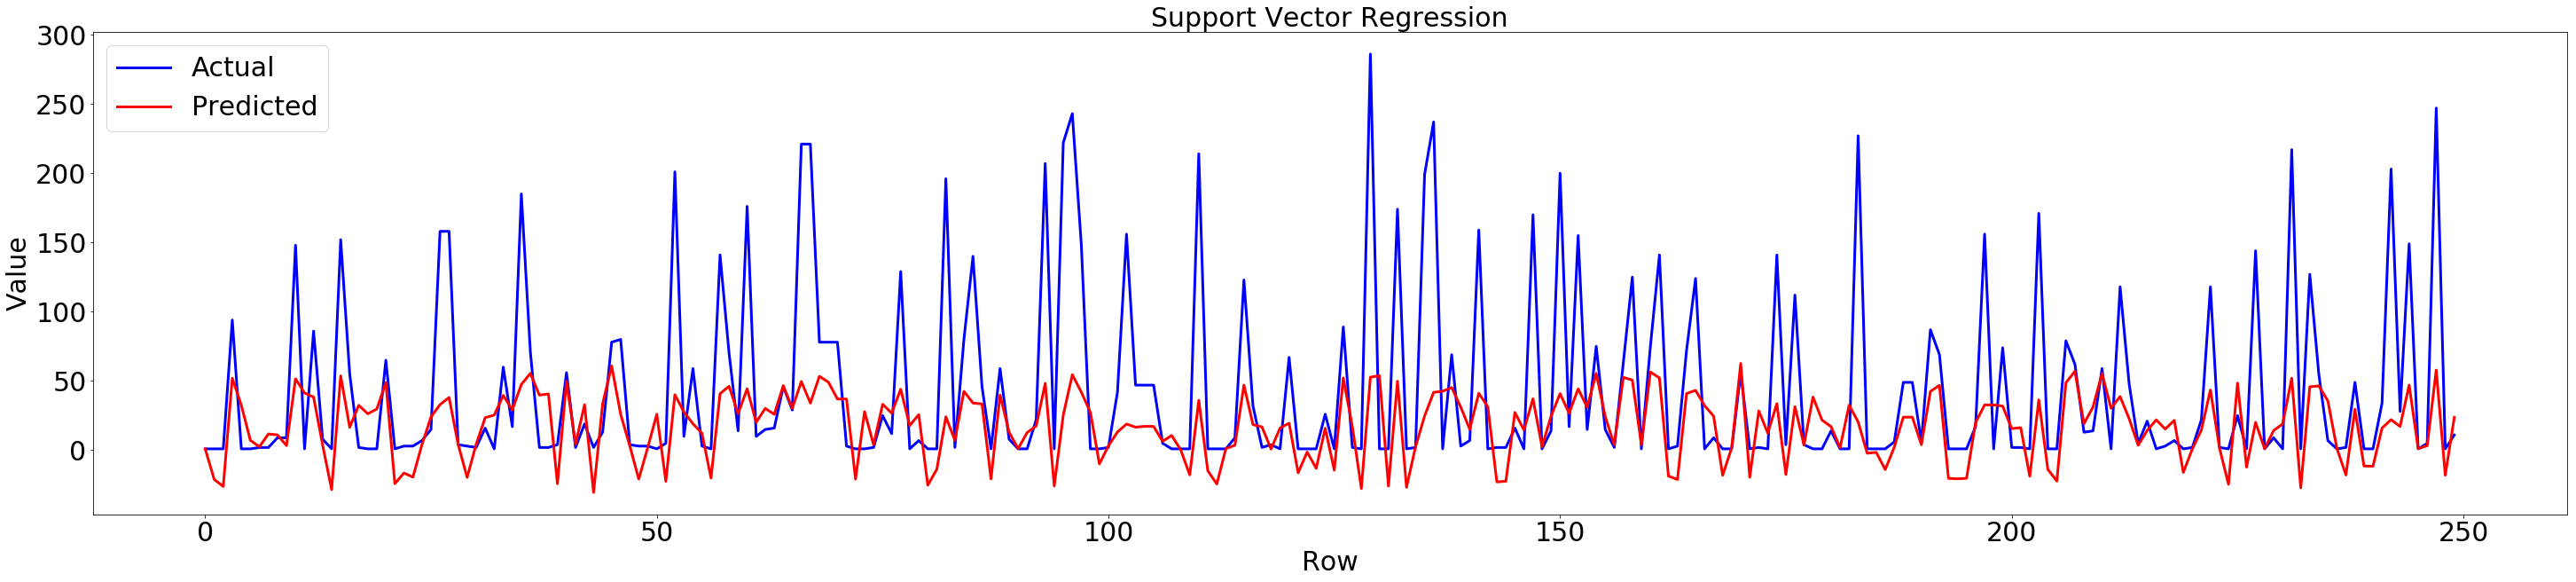

In [121]:
plt.figure(figsize=(50,10))
plt.plot(data_test_target.iloc[0:250].values, color="blue",
         label="Actual", linewidth=3)
plt.plot(pred_svm[0:250], color="red",
         label="Predicted", linewidth=3)
plt.xlabel("Row", size= 30)
plt.ylabel("Value", size= 30)
plt.title("Support Vector Regression", size= 30)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend(prop={'size': 30})
plt.show()

In [124]:
mae_1 = metrics.mean_absolute_error(data_test_target,pred_svm)
mse_1 = metrics.mean_squared_error(data_test_target,pred_svm)
rmse_1 = sqrt(mse_1) 

print('Mean Absolute Error: %.2f' % mae_1)  
print('Mean Squared Error : %.2f' % mse_1)
print('Root Mean Squared Error : %.2f' % rmse_1)

Mean Absolute Error: 31.21
Mean Squared Error : 2902.53
Root Mean Squared Error : 53.88


#### Building the Linear Regression Model

In [90]:
import numpy as np
import statsmodels.formula.api as sm
import sklearn.metrics as metrics

sm_model = sm.OLS(data_train_target, data_train).fit()
sm_pred = sm_model.predict(data_test)


sm_mae = metrics.mean_absolute_error(data_test_target,sm_pred)
sm_mse = metrics.mean_squared_error(data_test_target,sm_pred)
sm_rmse = np.sqrt(sm_mse)

print('Linear Regression Metrics:')
print(f'Mean Absolute Error: {sm_mae}')
print(f'Mean Squared Error: {sm_mse}')
print(f'Root Mean Squared Error: {sm_rmse}')

Linear Regression Metrics:
Mean Absolute Error: 46.89103495582919
Mean Squared Error: 4978.6846037549585
Root Mean Squared Error: 70.55979452744288


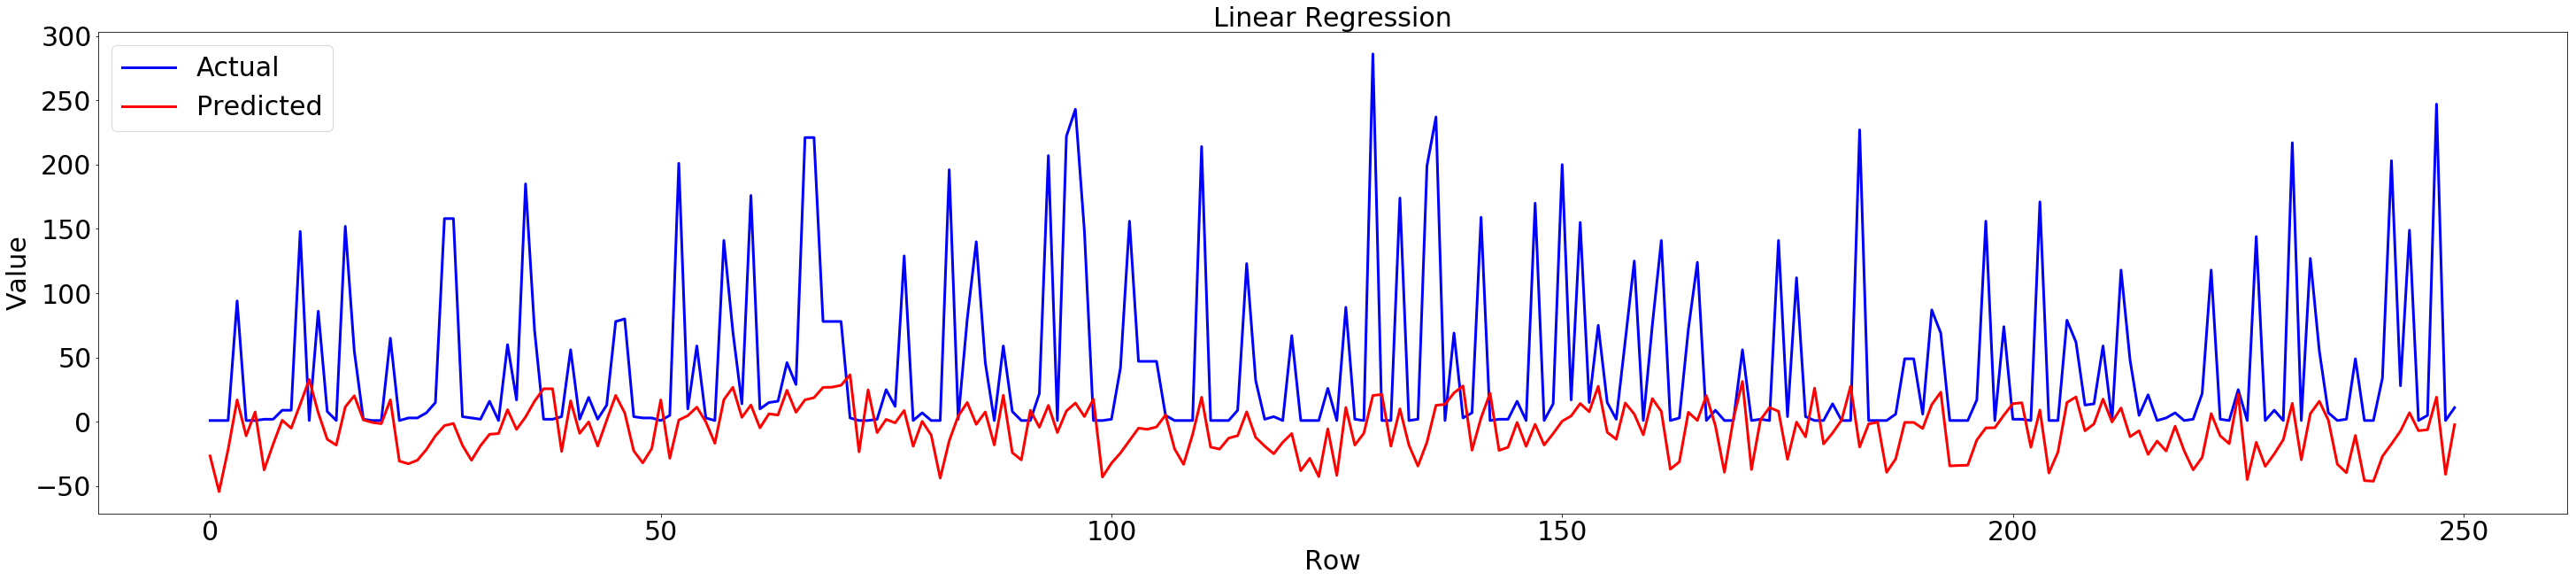

In [99]:
plt.figure(figsize=(50,10))
plt.plot(data_test_target.iloc[0:250].values, color="blue",
         label="Actual", linewidth=3)
plt.plot(sm_pred[0:250].values, color="red",
         label="Predicted", linewidth=3)
plt.xlabel("Row", size= 30)
plt.ylabel("Value", size= 30)
plt.title("Linear Regression", size= 30)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend(prop={'size': 30})
plt.show()

#### Building the Bayesian Ridge Regression Model

In [109]:
import numpy as np
from sklearn.linear_model import BayesianRidge
import sklearn.metrics as metrics

br = BayesianRidge(compute_score=True)
br.fit(data_train, data_train_target)

br_pred = br.predict(data_test)

br_mae = metrics.mean_absolute_error(data_test_target,br_pred)
br_mse = metrics.mean_squared_error(data_test_target,br_pred)
br_rmse = np.sqrt(br_mse)

print('Bayesian Ridge Regression Metrics:')
print(f'Mean Absolute Error: {br_mae}')
print(f'Mean Squared Error: {br_mse}')
print(f'Root Mean Squared Error: {br_rmse}')

Bayesian Ridge Regression Metrics:
Mean Absolute Error: 40.841410449142444
Mean Squared Error: 3201.0064182749657
Root Mean Squared Error: 56.57743736044401


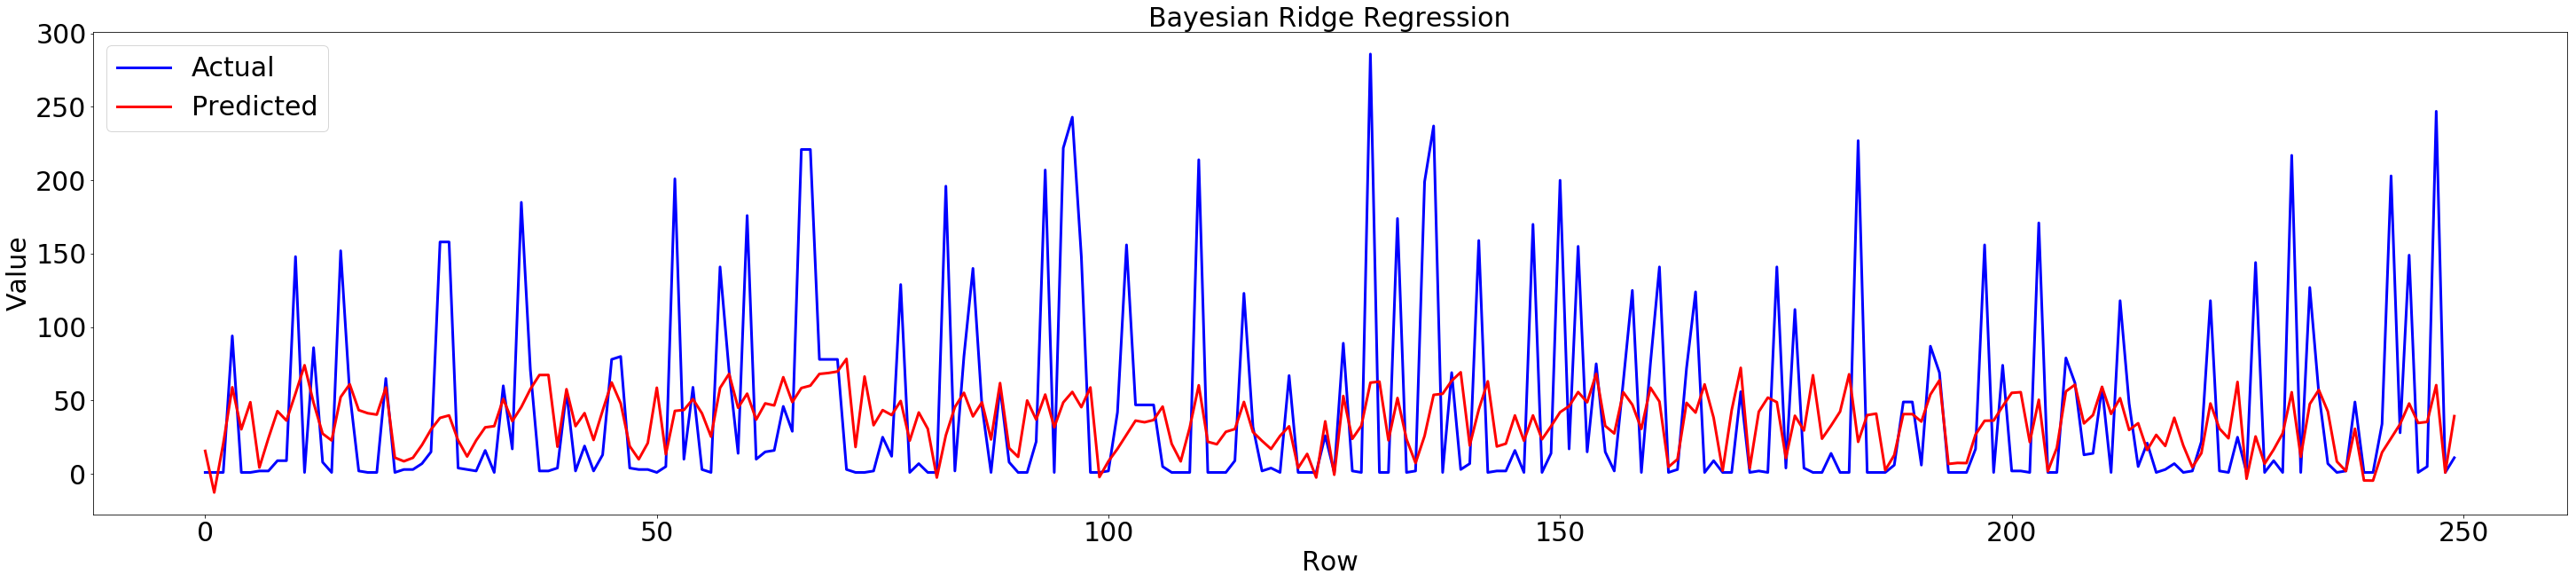

In [103]:
plt.figure(figsize=(50,10))
plt.plot(data_test_target.iloc[0:250].values, color="blue",
         label="Actual", linewidth=3)
plt.plot(br_pred[0:250], color="red",
         label="Predicted", linewidth=3)
plt.xlabel("Row", size= 30)
plt.ylabel("Value", size= 30)
plt.title("Bayesian Ridge Regression", size= 30)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend(prop={'size': 30})
plt.show()